<a href="https://colab.research.google.com/github/DatumLearning/Mediapipe-playlist/blob/main/hand_landmark_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 6.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


In [2]:
!wget -q https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task

In [3]:
!wget -q -O image.jpg https://storage.googleapis.com/mediapipe-tasks/hand_landmarker/woman_hands.jpg

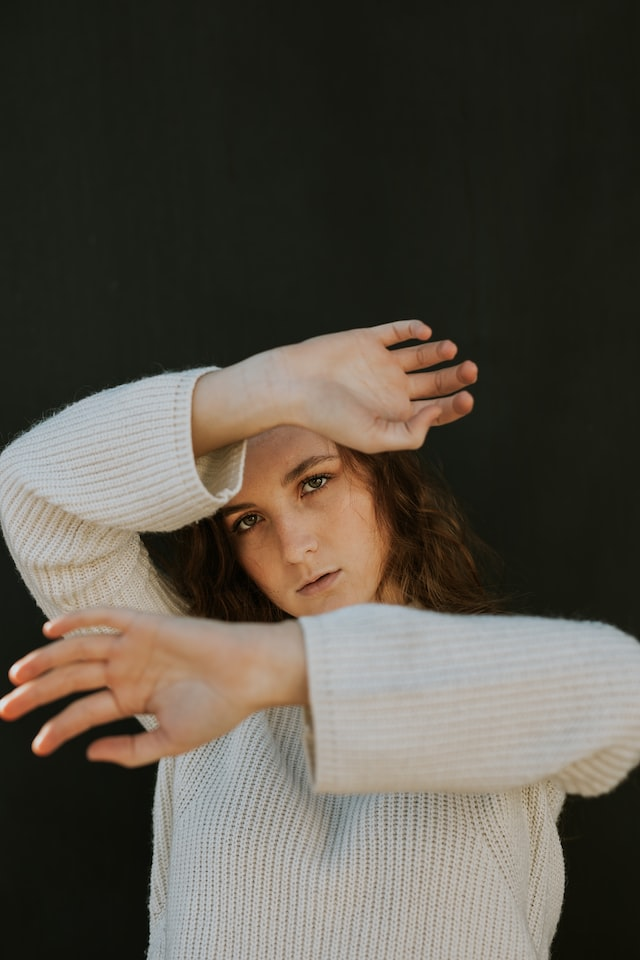

In [4]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("image.jpg")
h , w , _ = img.shape
cv2_imshow(img)

In [5]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

In [6]:
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

In [7]:
image = mp.Image.create_from_file("image.jpg")

In [8]:
detection_result = detector.detect(image)

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [9]:
dir(detection_result)

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__match_args__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'hand_landmarks',
 'hand_world_landmarks',
 'handedness']

In [13]:
detection_result.hand_landmarks[0][4]

NormalizedLandmark(x=0.15704940259456635, y=0.7829774022102356, z=-0.04580849036574364, visibility=0.0, presence=0.0)

In [11]:
detection_result.handedness

[[Category(index=1, score=0.9357714653015137, display_name='Left', category_name='Left')],
 [Category(index=0, score=0.960895299911499, display_name='Right', category_name='Right')]]

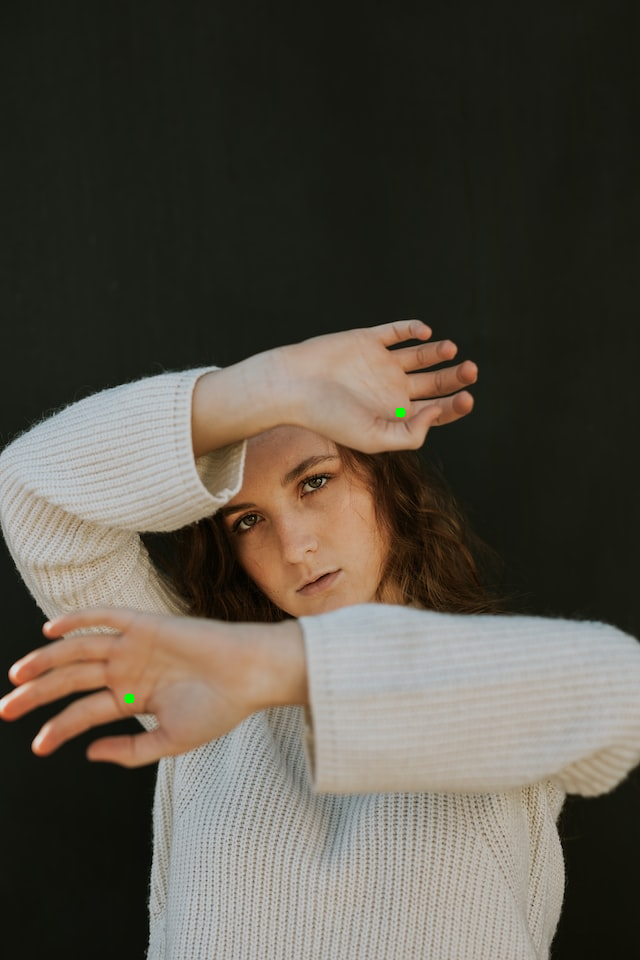

In [14]:
img = cv2.imread("/content/image.jpg")
for lmarks in detection_result.hand_landmarks:
  x_cord = int(lmarks[5].x * w)
  y_cord = int(lmarks[5].y * h)
  img = cv2.circle(img , (x_cord , y_cord) , 5 , (0 , 255 , 0) , -1)
cv2_imshow(img)